In [2]:
import numpy as np
import pandas as pd

In [3]:
filepath = '/Users/gracegupta/Downloads/NOTEEVENTS.csv'

In [4]:
pd.read_csv(filepath, nrows=2)

ROW_ID  SUBJECT_ID  HADM_ID   CHARTDATE  CHARTTIME  STORETIME  \
0     174       22532   167853  2151-08-04        NaN        NaN   
1     175       13702   107527  2118-06-14        NaN        NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...

In [5]:
# Look at the first few rows of the CSV file
dtypes = {"ROW_ID": int, "SUBJECT_ID": int, "HADM_ID": float, "CHARTDATE": str, "CHARTTIME": str,
         "STORETIME": str, "CATEGORY": str, "DESCRIPTION": str, "CGID": float, "ISERROR": str, "TEXT": str}
parse_dates = ["CHARTTIME", "STORETIME"]
appended_data = []
chunksize = 10 ** 6
for chunk in pd.read_csv(filepath, dtype = dtypes, parse_dates = parse_dates, chunksize=chunksize):
    appended_data.append(chunk)

In [6]:
appended_data = pd.concat(appended_data)

In [7]:
df = pd.DataFrame(appended_data)
print(df.shape)

(2083180, 11)


In [8]:
df.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaT       NaT   
1     175       13702  107527.0  2118-06-14       NaT       NaT   
2     176       13702  167118.0  2119-05-25       NaT       NaT   
3     177       13702  196489.0  2124-08-18       NaT       NaT   
4     178       26880  135453.0  2162-03-25       NaT       NaT   

            CATEGORY DESCRIPTION  CGID ISERROR  \
0  Discharge summary      Report   NaN     NaN   
1  Discharge summary      Report   NaN     NaN   
2  Discharge summary      Report   NaN     NaN   
3  Discharge summary      Report   NaN     NaN   
4  Discharge summary      Report   NaN     NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Date:  [**2162-3-3**]              D...

In [9]:
print(df['CATEGORY'].unique())

['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']


In [10]:
print(df['DESCRIPTION'].unique())

['Report' 'Addendum' 'Nursing Transfer Note' ...
 'PLACE CATH CAROTID/INOM ART' 'L US MSK ASPIRATE/INJ GANGLION CYST LEFT'
 'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.']


In [11]:
df.isnull().sum()

ROW_ID               0
SUBJECT_ID           0
HADM_ID         231836
CHARTDATE            0
CHARTTIME       316566
STORETIME       836776
CATEGORY             0
DESCRIPTION          0
CGID            836776
ISERROR        2082294
TEXT                 0
dtype: int64

In [47]:
df['CATEGORY'].value_counts() #Nursing and Radiology have the most notes, but Nursing and Physician have the most errors

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [291]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
#import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import *

In [292]:
df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Number of notes per category', xTitle='Category Name')

In [65]:
df["CATEGORY"].value_counts(normalize=True)

Nursing/other        0.394828
Radiology            0.250712
Nursing              0.107315
ECG                  0.100352
Physician            0.067985
Discharge summary    0.028635
Echo                 0.021983
Respiratory          0.015236
Nutrition            0.004521
General              0.003985
Rehab Services       0.002607
Social Work          0.001282
Case Management      0.000464
Pharmacy             0.000049
Consult              0.000047
Name: CATEGORY, dtype: float64

In [57]:
radiology = df.loc[df["CATEGORY"]=="Radiology"];

In [56]:
radiology['DESCRIPTION'].value_counts();

In [58]:
nursing = df.loc[df["CATEGORY"]=="Nursing"];

In [61]:
nursing['DESCRIPTION'].value_counts();

In [12]:
iserror_nulls = df.loc[df['ISERROR'].isnull()]

In [13]:
len(iserror_nulls)

2082294

In [14]:
iserror_nulls.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaT       NaT   
1     175       13702  107527.0  2118-06-14       NaT       NaT   
2     176       13702  167118.0  2119-05-25       NaT       NaT   
3     177       13702  196489.0  2124-08-18       NaT       NaT   
4     178       26880  135453.0  2162-03-25       NaT       NaT   

            CATEGORY DESCRIPTION  CGID ISERROR  \
0  Discharge summary      Report   NaN     NaN   
1  Discharge summary      Report   NaN     NaN   
2  Discharge summary      Report   NaN     NaN   
3  Discharge summary      Report   NaN     NaN   
4  Discharge summary      Report   NaN     NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Date:  [**2162-3-3**]              D...

In [119]:
#iserror_nulls.groupby("CATEGORY")['ISERROR'].sum()

In [17]:
len(iserror_nulls)/len(df) #99.9% are marked as having no error.

0.9995746886970881

# Drop all error rows.

In [18]:
df_nonull = df.drop(df[df['ISERROR'].isnull()].index)

In [19]:
len(df_nonull) #886 errors

886

In [121]:
df_nonull.groupby("CATEGORY")['ISERROR'].count()  

CATEGORY
Case Management      14
General              65
Nursing             374
Nutrition            18
Pharmacy              2
Physician           343
Rehab Services       23
Respiratory          38
Social Work           9
Name: ISERROR, dtype: int64

In [46]:
#most errors come from nursing progress notes, physician progress notes, and nursing transfer notes
df_nonull["DESCRIPTION"].value_counts();

# Create Random Sample

In [62]:
sample1 = df.sample(frac=0.125, replace=True, random_state=1)

In [63]:
sample1["CATEGORY"].value_counts() #number of notes per category

Nursing/other        102778
Radiology             65434
Nursing               27739
ECG                   26042
Physician             17759
Discharge summary      7491
Echo                   5775
Respiratory            4024
Nutrition              1227
General                 991
Rehab Services          687
Social Work             298
Case Management         124
Pharmacy                 17
Consult                  12
Name: CATEGORY, dtype: int64

In [64]:
sample1["CATEGORY"].value_counts(normalize=True) #percentages are approximately same as population

Nursing/other        0.394696
Radiology            0.251285
Nursing              0.106525
ECG                  0.100008
Physician            0.068199
Discharge summary    0.028768
Echo                 0.022178
Respiratory          0.015453
Nutrition            0.004712
General              0.003806
Rehab Services       0.002638
Social Work          0.001144
Case Management      0.000476
Pharmacy             0.000065
Consult              0.000046
Name: CATEGORY, dtype: float64

# Try Sentiment Analysis with TextBlob

In [106]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import textblob

In [107]:
from textblob import TextBlob

In [108]:
sample1['sentiment'] = sample1.TEXT.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [117]:
sample1.groupby("CATEGORY")['sentiment'].median()

CATEGORY
Case Management      0.031875
Consult              0.012808
Discharge summary   -0.009448
ECG                 -0.016667
Echo                 0.104274
General              0.000000
Nursing              0.047473
Nursing/other        0.046667
Nutrition            0.032727
Pharmacy             0.044895
Physician           -0.003486
Radiology            0.038889
Rehab Services       0.019253
Respiratory          0.082143
Social Work          0.040295
Name: sentiment, dtype: float64

# Histogram of sentiment of largest notes category (nursing/other)

In [134]:
sample1.groupby(["CATEGORY", "DESCRIPTION"])['sentiment'].median()

CATEGORY          DESCRIPTION                                   
Case Management   Assessment & Discharge Planning Note             -0.008123
                  Assessment & Initial Discharge Planning           0.014583
                  Assessment and Initial Discharge Planning Note    0.064706
                  Case Management Assessment                        0.020833
                  Case Management Continued Stay Review             0.059393
                  Case Management Dicharge Plan                    -0.067308
                  Case Management Discharge Plan                   -0.005556
                  Case Management Discharge Plan - Final           -0.062500
                  Case Management Initial Assessment                0.012500
                  Case Management Note                              0.250000
                  Case Managment Initial Patient Assessment         0.022917
                  DC Plan                                           0.150000
           

In [220]:
sample1["CATEGORY"].unique()

array(['ECG', 'Nursing', 'Nutrition', 'Nursing/other', 'Radiology',
       'Echo', 'Physician ', 'Respiratory ', 'Discharge summary',
       'Social Work', 'General', 'Case Management ', 'Rehab Services',
       'Pharmacy', 'Consult'], dtype=object)

In [222]:
sample1_phys = sample1.loc[sample1["CATEGORY"]=="Physician "]

In [225]:
sample1_phys.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Addendum to Housestaff Admission Note                0.008939
Admission - Overnight Intensivist                    0.071014
Admission Note                                      -0.019302
Admission Note - Surgical Critical Care             -0.054577
Arterial Line Insertion Procedure Note               0.125000
Arterial Line Placement                              0.070833
Arterial Line Procedure Note                         0.366667
Attending  Note                                     -0.056250
Attending Admit Note                                 0.068040
Attending Event Note- ARREST and GIB                 0.051984
Attending Note                                       0.078125
Attending Progress Note                              0.022155
Attending Teaching Physician Note                    0.013248
Attending note                                       0.007582
Attending/Physician Resident Progress Note - MICU    0.047719
Bronchoscopy                                        -0.035

In [234]:
sample1_discharge = sample1.loc[sample1["CATEGORY"]=="Discharge summary"]

In [205]:
sample1_discharge.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Addendum   -0.296875
Report     -0.004961
Name: sentiment, dtype: float64

DESCRIPTION
Addendum    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Report      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

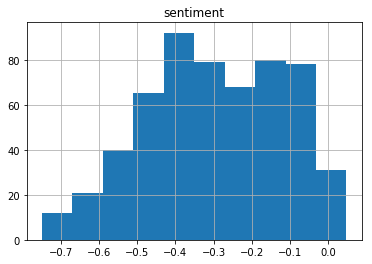

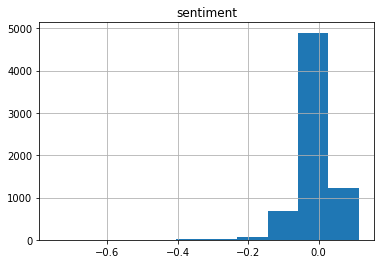

In [206]:
sample1_discharge.groupby("DESCRIPTION").hist(column='sentiment')

In [289]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
#import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import *

In [280]:
x1 = sample1_discharge.loc[sample1_discharge['DESCRIPTION'] == "Addendum", 'sentiment']
x0 = sample1_discharge.loc[sample1_discharge['DESCRIPTION'] == "Report", 'sentiment']

In [281]:
import plotly.graph_objs as go

trace1 = go.Histogram(
    x=x0, name='Report',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Addendum',
    opacity=0.75
)

In [290]:
data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Sentiment Distribution of Discharge Summaries based on Description Type')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [207]:
sample1_ecg = sample1.loc[sample1["CATEGORY"]=="ECG"]

In [209]:
sample1_ecg.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Report   -0.016667
Name: sentiment, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15b474ba8>]],
      dtype=object)

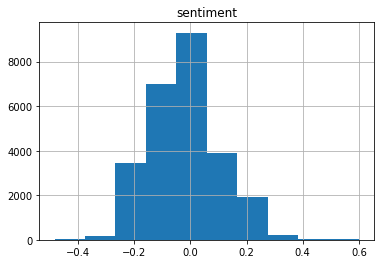

In [210]:
sample1_ecg.hist(column='sentiment')

In [217]:
sample1_radiology = sample1.loc[sample1["CATEGORY"]=="Radiology"]

In [218]:
sample1_radiology.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
' FILM ORTHO AP LOWER EXT                               0.050311
-50 BILAT INJ CHOLANG EXIST PERC/TUBE                   0.064435
-PUNCTURE                                               0.000000
1SR ORDER BRANCH VENOUS SYSTEM                          0.122095
1SR ORDER THOR/BRACHIOCEPHALIC                          0.125731
2ND ORDER OR> VENOUS SYSTEM                             0.090288
2ND ORDER THOR/BRACHIOCEPHALIC                          0.088690
3ED ORDER THOR/BRACHIOCEPHALIC                          0.070607
A-GRAM CAROTID/CERVICAL, UNILAT                         0.050000
A/C JOINTS BILAT                                        0.121726
ABD (SINGLE VIEW ONLY)                                  0.018254
ABD COMPL INCLUDING LAT DECUB                          -0.049158
ABDOMEN & PELVIS US                                     0.035577
ABDOMEN (SUPINE & ERECT)                                0.026389
ABDOMEN (SUPINE ONLY)                                   0.021429
ABDOMEN SGL V

In [153]:
sample1_nursing = sample1.loc[sample1["CATEGORY"]=="Nursing/other"]

In [154]:
sample1_nursing.groupby("DESCRIPTION")['sentiment'].median() 

DESCRIPTION
Report    0.046667
Name: sentiment, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15932dba8>]],
      dtype=object)

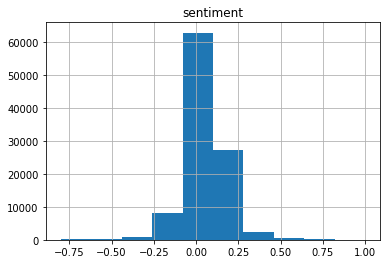

In [155]:
sample1_nursing.hist(column='sentiment')

In [263]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

sample1_nursing["sentiment"].iplot(
    kind='hist',
    bins=50,
    xTitle='sentiment',
    linecolor='black',
    yTitle='count',
    title='Sentiment Distribution of Reports from Nursing/other')

In [260]:
nursing_low_sentiment = sample1_nursing[sample1_nursing.sentiment < -0.5]

In [159]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])
    tokens = [token for token in tokens if token not in stopwords]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [188]:
processed_text = []
for text in nursing_low_sentiment["TEXT"]:
    processed_text.append(preprocessing(text))

In [161]:
import gensim
processed_text = [text.split() for text in processed_text]

In [162]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [163]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text];

In [176]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [177]:
lda_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.105*":" + 0.052*"[" + 0.052*"]" + 0.051*";" + 0.048*"start" + 0.048*"date" + 0.048*"added" + 0.044*"to" + 0.042*"pathway" + 0.042*"revision"'),
 (1,
  '0.091*"." + 0.061*"," + 0.035*"pt" + 0.019*"bloody" + 0.014*"**" + 0.013*"care" + 0.013*":" + 0.011*"]" + 0.011*"[" + 0.010*"secretion"'),
 (2,
  '0.091*":" + 0.068*"]" + 0.068*"[" + 0.068*";" + 0.067*"start" + 0.067*"added" + 0.067*"date" + 0.031*"alt" + 0.029*"2" + 0.028*"3"'),
 (3,
  '0.022*"." + 0.017*"%" + 0.013*"02" + 0.012*"npn" + 0.011*"sat" + 0.010*")" + 0.010*"(" + 0.010*"@" + 0.010*"**known" + 0.010*"lastname"'),
 (4,
  '0.110*"." + 0.027*":" + 0.027*"[" + 0.027*"]" + 0.021*"**" + 0.016*"resp" + 0.013*"," + 0.011*"(" + 0.011*")" + 0.011*"care"')]

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [189]:
get_top_n_words(processed_text, n=40)

[('start', 778),
 ('date', 776),
 ('added', 775),
 ('to', 304),
 ('alt', 296),
 ('revision', 291),
 ('pathway', 291),
 ('fen', 211),
 ('resp', 191),
 ('sepsis', 176),
 ('parenting', 124),
 ('10', 117),
 ('12', 111),
 ('respiratory', 97),
 ('11', 83),
 ('parent', 80),
 ('cv', 74),
 ('potential', 70),
 ('infant', 69),
 ('dev', 69),
 ('development', 66),
 ('bili', 61),
 ('pt', 59),
 ('hyperbilirubinemia', 54),
 ('23', 51),
 ('distress', 49),
 ('term', 48),
 ('hyperbili', 47),
 ('status', 45),
 ('24', 44),
 ('19', 42),
 ('growth', 41),
 ('30', 40),
 ('care', 34),
 ('21', 33),
 ('family', 33),
 ('22', 33),
 ('pot', 32),
 ('bloody', 32),
 ('26', 32)]

In [203]:
processed_text[5]

'1 term respiratory distress 2 fen 3 sepsis 4 developmental 5 parenting revision to pathway : 1 term respiratory distress ; added etiology : transient tachypnea newborn meconium aspiration start date : [ **2102-1-3** ] 2 fen ; added start date : [ **2102-1-3** ] 3 sepsis ; added start date : [ **2102-1-3** ] 4 developmental ; added start date : [ **2102-1-3** ] 5 parenting ; added start date : [ **2102-1-3** ]'

In [190]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [191]:
processed_text_split = [text.split() for text in processed_text]

In [192]:
# build vocabulary and train model
model = gensim.models.Word2Vec(
        processed_text_split,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

In [194]:
list(model.wv.vocab);

In [197]:
model.wv.most_similar(positive="respiratory", topn=20)

[('distress', 0.9992078542709351),
 ('term', 0.9991044402122498),
 ('infant', 0.9963061213493347),
 ('**2191-6-30**', 0.9958853721618652),
 ('etiology', 0.9947524070739746),
 ('**2144-6-23**', 0.994400143623352),
 ('transient', 0.9939732551574707),
 ("d/c'd", 0.9935303330421448),
 ('developmental', 0.993424654006958),
 ('tachypnea', 0.9933598041534424),
 ('in', 0.9933580160140991),
 ('aspiration', 0.9933411478996277),
 ('f/e/n', 0.9931755661964417),
 ('status', 0.9927761554718018),
 ('**2105-11-1**', 0.9927406907081604),
 ('meconium', 0.9927401542663574),
 ('cvr', 0.9923598766326904),
 ('fluid', 0.9920266270637512),
 ('cardiovascular', 0.9920263886451721),
 ('newborn', 0.9920243620872498)]

In [235]:
sample1_discharge_addn = sample1_discharge.groupby("DESCRIPTION")

In [238]:
sample1_discharge_addn["DESCRIPTION"].unique()

DESCRIPTION
Addendum    [Addendum]
Report        [Report]
Name: DESCRIPTION, dtype: object

In [296]:
sample1_discharge_addn = sample1_discharge.loc[sample1_discharge["DESCRIPTION"] == "Addendum"]

In [297]:
discharge_addn_negative = sample1_discharge_addn[sample1_discharge_addn.sentiment < -0.4]

In [331]:
processed_discharge_addn = []
for text in discharge_addn_negative["TEXT"]:
    processed_discharge_addn.append(preprocessing(text))

In [248]:
get_top_n_words(processed_discharge_addn, n=40)

[('date', 518),
 ('name', 455),
 ('known', 421),
 ('md', 410),
 ('discharge', 389),
 ('no', 237),
 ('first', 235),
 ('service', 218),
 ('number', 205),
 ('last', 204),
 ('lastname', 190),
 ('allergy', 189),
 ('admission', 184),
 ('unit', 174),
 ('numeric', 171),
 ('identifier', 171),
 ('birth', 171),
 ('sex', 171),
 ('firstname', 169),
 ('addendum', 168),
 ('patient', 155),
 ('lf', 139),
 ('name3', 135),
 ('completed', 132),
 ('attending', 130),
 ('disposition', 130),
 ('10', 120),
 ('facility', 114),
 ('12', 113),
 ('11', 105),
 ('namepattern4', 92),
 ('job', 90),
 ('care', 84),
 ('home', 76),
 ('name8', 74),
 ('un', 70),
 ('name11', 70),
 ('pattern1', 70),
 ('mg', 68),
 ('extended', 68)]

In [293]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [322]:
common_words_nursing = get_top_n_bigram(processed_text, 70)

In [324]:
df_nursing = pd.DataFrame(common_words_nursing, columns = ['Text' , 'count'])

In [326]:
df_nursing

Text  count
0                    start date    775
1                   added start    755
2                   revision to    291
3                    to pathway    291
4                     fen added    102
5                  sepsis added     81
6              potential sepsis     70
7                    resp added     64
8              infant potential     60
9               parenting added     59
10                      alt fen     56
11                     alt resp     52
12             term respiratory     48
13         respiratory distress     48
14                 parent added     40
15           parenting revision     38
16                 pathway resp     38
17                alt parenting     38
18                  pathway alt     36
19                    dev added     34
20            development added     31
21                     resp fen     31
22              parent revision     29
23               pathway infant     29
24                     cv added     28
25     hyperbilirubinemia added     27
26                   bili added     27
27           growth development     27
28                    date 2158     27
29  hyperbilirubinemia revision     25
..                          ...    ...
40            pathway hyperbili     20
41               distress added     20
42               added etiology     20
43           etiology transient     20
44          transient tachypnea     20
45            tachypnea newborn     20
46             newborn meconium     20
47          meconium aspiration     20
48             aspiration start     20
49                    date 2152     20
50                  resp status     20
51                   fen parent     20
52                    date 2162     20
53                 status added     19
54                    resp care     19
55            respiratory added     19
56           hyperbili revision     18
57                    date 2191     18
58                 pathway bili     17
59                    date 2138     17
60                    date 2196     17
61                        12 21     16
62                    cv status     16
63                    date 2126     16
64                   alt growth     16
65          pathway respiratory     16
66                    date 2118     16
67                    date 2157     15
68                      fen dev     15
69                    date 2200     15

[70 rows x 2 columns]

In [327]:
df_nursing[5:25].groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 top bigrams in Nursing/Other Reports')

In [314]:
common_words = get_top_n_bigram(processed_discharge_addn, 70)

In [315]:
df3 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

In [320]:
df3.iloc[50:70]

Text  count
50                 mg po     34
51         pattern1 last     31
52           name stitle     28
53               by last     27
54       service surgery     24
55       surgery allergy     24
56          addendum the     24
57               md last     23
58    patient discharged     22
59               dr last     22
60    facility hospital3     22
61            allergy no     21
62       allergy adverse     21
63          adverse drug     21
64         drug reaction     21
65    reaction attending     21
66  service neurosurgery     20
67  neurosurgery allergy     19
68     facility location     18
69    facility hospital6     17

In [321]:
df3.iloc[50:70].groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 top bigrams in Discharge Summary Addendums')

In [334]:
from sklearn.decomposition import TruncatedSVD
reindexed_data = discharge_addn_negative["TEXT"]
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [336]:
from collections import Counter
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [337]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  date md known
Topic 2:  job 13 2178
Topic 3:  2134 2133 2042
Topic 4:  mg po 2153
Topic 5:  2179 11110 1012
Topic 6:  2187 failure 20


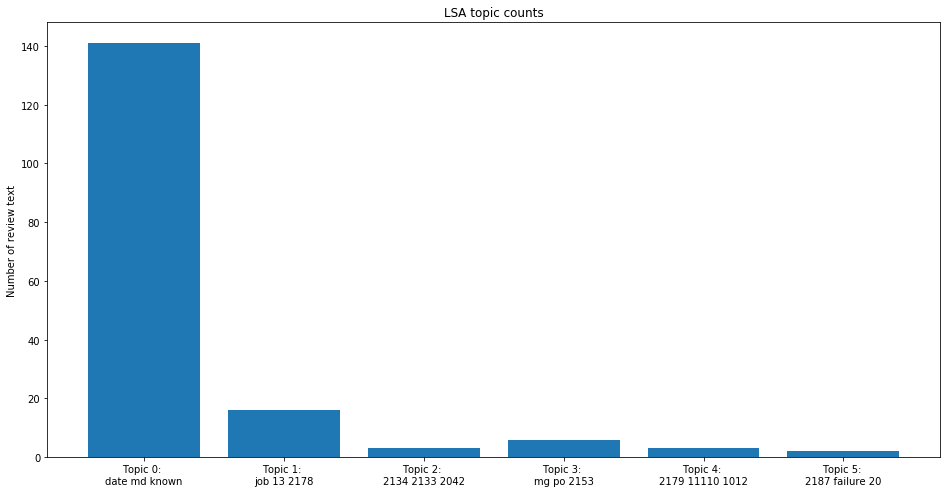

In [339]:
import matplotlib.pyplot as plt

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [251]:
import gensim
processed_discharge_addn = [text.split() for text in processed_discharge_addn]

dictionary = gensim.corpora.Dictionary(processed_discharge_addn)

bow_corpus = [dictionary.doc2bow(text) for text in processed_discharge_addn];

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [252]:
lda_model.print_topics(num_topics=5, num_words=10)

[(0,
  '0.094*":" + 0.091*"]" + 0.091*"[" + 0.033*"(" + 0.033*")" + 0.023*"." + 0.022*"date" + 0.018*"name" + 0.016*"discharge" + 0.015*"**known"'),
 (1,
  '0.006*"graft" + 0.006*">" + 0.005*"artery" + 0.005*"vein" + 0.005*"saphenous" + 0.005*"descending" + 0.005*"left" + 0.003*"**2173-9-7**" + 0.003*"**2173-9-2**" + 0.003*"anterior"'),
 (2,
  '0.097*"[" + 0.097*"]" + 0.085*":" + 0.034*")" + 0.034*"(" + 0.020*"date" + 0.018*"**" + 0.018*"name" + 0.018*"." + 0.016*","'),
 (3,
  '0.047*"," + 0.040*"mg" + 0.033*"po" + 0.022*"q" + 0.011*"[" + 0.011*"]" + 0.010*"prn" + 0.010*"bid" + 0.009*":" + 0.008*"day"'),
 (4,
  '0.000*":" + 0.000*"]" + 0.000*"[" + 0.000*"mg" + 0.000*"," + 0.000*")" + 0.000*"." + 0.000*"(" + 0.000*"po" + 0.000*"q"')]

# Topic modeling

In [122]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])
    tokens = [token for token in tokens if token not in stopwords]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [123]:
processed_text = []
for text in sample1["TEXT"]:
    processed_text.append(preprocessing(text))

In [125]:
import gensim

In [127]:
processed_text = [text.split() for text in processed_text]

In [128]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [129]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text];

In [130]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/gracegupta/anaconda3/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 337, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/Users/gracegupta/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py", line 742, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/Users/graceg

KeyboardInterrupt: 

Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/Users/gracegupta/anaconda3/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/Users/gracegupta/anaconda3/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 334, in worke

# Tried using Naive Bayes

In [83]:
#try getting df with category and text
subset = sample1.loc[:,('TEXT','CATEGORY')]

In [84]:
subset.head()

TEXT       CATEGORY
128037   Ventricular pacing. Probable atrial fibrillati...            ECG
491755   65 yo male w/ pmh including: HTN, DM& hyperlip...        Nursing
470924   Subjective\n   Appetite - poor, Patient with p...      Nutrition
1840200  Attending Note\nDay of life 4 CGA 34\nstable i...  Nursing/other
491263   74yoM h/o HIV on HAART, Afib,  ETOH abuse tran...        Nursing

In [97]:
subset_dict = subset.set_index('TEXT')['CATEGORY'].to_dict()

In [100]:
len(subset_dict)

242095

In [102]:
subset_dict[0]

KeyError: 0

In [71]:
words = []
for wordList in texts:
    words += wordList

In [72]:
import nltk
all_words = nltk.FreqDist(w.lower() for w in words)

In [73]:
word_features = list(all_words)[:2000]

In [74]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [101]:
#Train Naive Bayes Classifier
featuresets = [(document_features(d), c) for (d,c) in subset_dict]

ValueError: too many values to unpack (expected 2)

In [87]:
train_set, test_set = featuresets[100:],featuresets[:100]

In [90]:
train_set

[]

In [88]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

ValueError: A ELE probability distribution must have at least one bin.

# Word Cloud and Frequency Table

In [58]:
#Check for null values
df['TEXT'].isnull().sum()

0

There are zero null values in the text column.

In [59]:
#view a text entry
text = df['TEXT']
text[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

Generate random sample.

In [60]:
text_sample = text.sample(frac = .01)

In [61]:
text_sample.head()

1901662    Respiratory Care\nPt currently on SIMV. Weaned...
1858879    NICU Fellow PN\nDOL 111\nWt 3520, up gm\nStabl...
120953     Sinus rhythm. Right bundle-branch block. Compa...
1090078    [**2146-11-11**] 4:38 PM\n CHEST PORT. LINE PL...
841401     [**2153-9-27**] 1:31 PM\n MR HEAD W/O CONTRAST...
Name: TEXT, dtype: object

In [62]:
print(len(text), len(text_sample)) #check if sample is 1% of text

2083180 20832


Using preprocessing method from nlp2

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])
    tokens = [token for token in tokens if token not in stopwords]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [14]:
processed_notes = []
for note in text_sample:
    processed_notes.append(preprocessing(note))

In [15]:
#print preprocessed versus original

#print(text_sample[1417988])
print()
#print(processed_notes[0]) 

# Generate Word Cloud

In [16]:
import sys
print(sys.executable)

/Users/gracegupta/anaconda3/bin/python


In [20]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
processed_notes = " ".join(processed_notes)

In [40]:
wordcloud = WordCloud(background_color="white").generate(processed_notes)

In [26]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

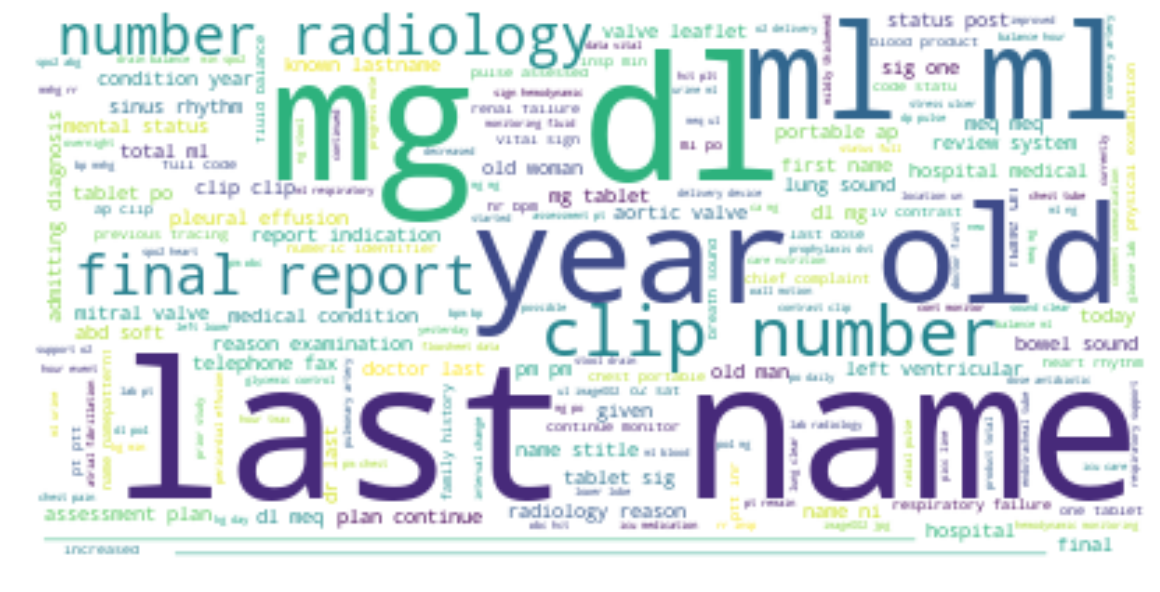

In [41]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [45]:
from collections import Counter 

In [43]:
split_it = processed_notes.split()

In [46]:
Counter = Counter(split_it)

In [49]:
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(20) 

In [50]:
print(most_occur)

[('.', 382319), (':', 270635), (',', 227521), ('[', 126702), (']', 126679), ('(', 106948), (')', 105850), ('-', 41908), ('pt', 29035), ('no', 26442), ('%', 22003), ('left', 21088), ('the', 20921), ('am', 20845), ('**', 20214), ('#', 20213), ('right', 19023), ('ml', 17646), ('patient', 16016), ('/', 15654)]
